In [4]:
api_key = "INSERT API KEY HERE"

In [5]:
import pandas as pd
from IPython.display import JSON
import numpy as np
from dateutil import parser
import isodate

# Data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

# Google API
from googleapiclient.discovery import build

In [6]:
# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
channel_ids = ['UCcZEPPdyeNDRKII4XLS3I0A']

In [8]:
api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client
youtube = build(
    api_service_name, api_version, developerKey=api_key)

In [9]:
def get_channel_stats(youtube, channel_ids):
    all_data = []

    request = youtube.channels().list(
        part = "snippet,contentDetails,statistics",
        id = ','.join(channel_ids)
    )
    response = request.execute()

    for item in response['items']:
        data = {'channelName' : item['snippet']['title'],
                'subscribers' : item['statistics']['subscriberCount'],
                'views' : item['statistics']['viewCount'],
                'totalVideos': item['statistics']['videoCount'],
                'playlistId' : item['contentDetails']['relatedPlaylists']['uploads']
               }
        all_data.append(data)

    return pd.DataFrame(all_data)

In [10]:
channel_stats = get_channel_stats(youtube, channel_ids)

In [11]:
channel_stats

,channelName,subscribers,views,totalVideos,playlistId
0,The Purple Palace,261000,15212569,171,UUcZEPPdyeNDRKII4XLS3I0A


In [12]:
playlist_id = "UUcZEPPdyeNDRKII4XLS3I0A"

def get_video_ids(youtube, playlist_id):

    video_ids = []

    request = youtube.playlistItems().list(
            part = "snippet, contentDetails",
            playlistId = playlist_id,
            maxResults = 50
    )
    response = request.execute()

    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')

    while next_page_token is not None:
        request = youtube.playlistItems().list(
            part = "snippet, contentDetails",
            playlistId = playlist_id,
            maxResults = 50,
            pageToken = next_page_token
        )
        response = request.execute()

        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])

            next_page_token = response.get('nextPageToken')

    return video_ids

In [13]:
video_ids = get_video_ids(youtube, playlist_id)

In [14]:
len(video_ids)

172

In [15]:
def get_video_details(youtube, video_ids):

    all_video_info = []

    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part = "snippet,contentDetails,statistics",
            id = ','.join(video_ids[i:i+50])
        )
        response = request.execute()

        for video in response['items']:
                    stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                                     'statistics': ['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                                     'contentDetails': ['duration', 'definition', 'caption']
                                    }
                    video_info = {}
                    video_info['video_id'] = video['id']

                    for k in stats_to_keep.keys():
                        for v in stats_to_keep[k]:
                            try:
                                video_info[v] = video[k][v]
                            except:
                                video_info[v] = None

                    all_video_info.append(video_info)

        return pd.DataFrame(all_video_info)

In [16]:
video_df = get_video_details(youtube, video_ids)

video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,iTusFvPp6DY,The Purple Palace,How to change your life in 2024 (a fresh start),"New year, new you! ;) The time is now!! Check ...","[2024 goals, change your life, life reset 2024...",2023-12-19T11:00:37Z,9087,734,None,67,PT31M45S,hd,false
1,Erh0uV3DM-g,The Purple Palace,They didn't know who they were dealing with !,Artist in Paris diaries chatty edition! Happy ...,"[paris diaries, paris vlog, life struggles lat...",2023-12-12T11:00:08Z,17706,1076,None,139,PT25M9S,hd,false
2,CmAwjc7dDKI,The Purple Palace,The future is unclear and that's okay,Art and chat in my kitchen! Happy holidays! Ch...,"[paint with me, art and chat, art studio, full...",2023-12-05T11:00:10Z,15940,1013,None,86,PT24M4S,hd,false
3,t978692VZX0,The Purple Palace,The reality of being a full time Artist in 202...,📚 My workbook for creatives out now: https://w...,"[full time artist vlog, the reality of being a...",2023-11-21T11:00:54Z,20245,1381,None,146,PT23M3S,hd,false
4,_2vokBGva70,The Purple Palace,your fear of being seen is keeping you small,"💘 GET THE ""VULNERABILITY IS MY SUPERPOWER"" JOU...","[your fear of being seen is holding you back, ...",2023-11-07T11:00:27Z,21306,1895,None,163,PT23M7S,hd,false
5,2gMBnbz_i5M,The Purple Palace,week in my life as an Artist in Paris,Week in my life as an Artist in Paris 💘 Thanks...,"[my new life in paris, week in my life in pari...",2023-10-24T10:00:01Z,19714,1179,None,103,PT19M16S,hd,false
6,Ey44-1i7fUI,The Purple Palace,a new chapter in my life in paris,📚 My workbook for creatives out now: https://w...,"[my new life in paris, week in my life in pari...",2023-10-17T10:00:19Z,36316,2087,None,143,PT14M16S,hd,false
7,9yyQfUHixgs,The Purple Palace,Artist in paris diaries :),📚 My workbook for creatives out now: https://w...,"[paris diaries, I bought my dream apartment in...",2023-10-03T10:00:07Z,20441,1346,None,108,PT15M9S,hd,false
8,sjCDefqhv78,The Purple Palace,Don't give up on your dream of being an Artist.,Lets talk about making it as an Artist! 💘 Than...,"[how to become a full time artist, full time a...",2023-09-19T10:00:50Z,23822,1516,None,156,PT25M19S,hd,false
9,r6klVy9mmcc,The Purple Palace,Renovating my Paris apartment - unexpected ob...,📚 My workbook for creatives out now: https://w...,"[paris diaries, I bought my dream apartment in...",2023-09-05T10:00:44Z,34543,1877,None,225,PT26M17S,hd,false


In [17]:
video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount         False
favouriteCount     True
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [18]:
video_df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [19]:
# Convert object to integer
cols = ['viewCount', 'likeCount', 'favouriteCount', 'commentCount']
video_df[cols] = video_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [20]:
# Create publish day (in the week) column
video_df['publishedAt'] =  video_df['publishedAt'].apply(lambda x: parser.parse(x))
video_df['pushblishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A"))

In [21]:
# convert duration to seconds
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [22]:
# Add number of tags
video_df['tagsCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [23]:
# Comments and likes per 1000 view ratio
video_df['likeRatio'] = video_df['likeCount']/ video_df['viewCount'] * 1000
video_df['commentRatio'] = video_df['commentCount']/ video_df['viewCount'] * 1000

In [24]:
# Title character length
video_df['titleLength'] = video_df['title'].apply(lambda x: len(x))

In [25]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagsCount,likeRatio,commentRatio,titleLength
0,iTusFvPp6DY,The Purple Palace,How to change your life in 2024 (a fresh start),"New year, new you! ;) The time is now!! Check ...","[2024 goals, change your life, life reset 2024...",2023-12-19 11:00:37+00:00,9087.0,734.0,NaN,67.0,PT31M45S,hd,false,Tuesday,1905.0,26,80.774733,7.373170,47
1,Erh0uV3DM-g,The Purple Palace,They didn't know who they were dealing with !,Artist in Paris diaries chatty edition! Happy ...,"[paris diaries, paris vlog, life struggles lat...",2023-12-12 11:00:08+00:00,17706.0,1076.0,NaN,139.0,PT25M9S,hd,false,Tuesday,1509.0,28,60.770360,7.850446,45
2,CmAwjc7dDKI,The Purple Palace,The future is unclear and that's okay,Art and chat in my kitchen! Happy holidays! Ch...,"[paint with me, art and chat, art studio, full...",2023-12-05 11:00:10+00:00,15940.0,1013.0,NaN,86.0,PT24M4S,hd,false,Tuesday,1444.0,27,63.550816,5.395232,37
3,t978692VZX0,The Purple Palace,The reality of being a full time Artist in 202...,📚 My workbook for creatives out now: https://w...,"[full time artist vlog, the reality of being a...",2023-11-21 11:00:54+00:00,20245.0,1381.0,NaN,146.0,PT23M3S,hd,false,Tuesday,1383.0,19,68.214374,7.211657,52
4,_2vokBGva70,The Purple Palace,your fear of being seen is keeping you small,"💘 GET THE ""VULNERABILITY IS MY SUPERPOWER"" JOU...","[your fear of being seen is holding you back, ...",2023-11-07 11:00:27+00:00,21306.0,1895.0,NaN,163.0,PT23M7S,hd,false,Tuesday,1387.0,20,88.942082,7.650427,44


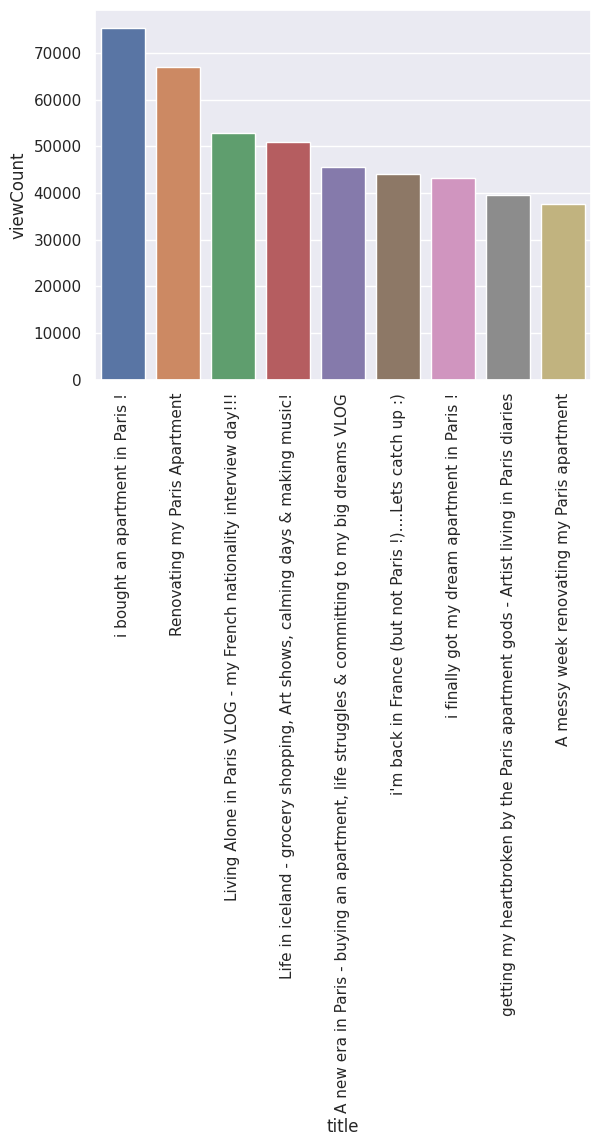

In [26]:
ax = sns.barplot(x = 'title', y='viewCount', data=video_df.sort_values('viewCount', ascending = False) [0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128330 (\N{DOVE OF PEACE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128330 (\N{DOVE OF PEACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


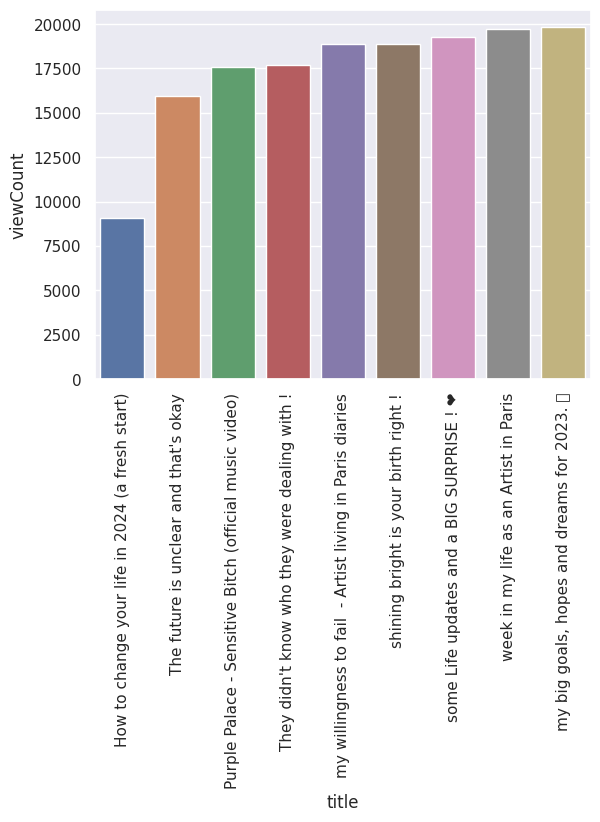

In [27]:
ax = sns.barplot(x = 'title', y='viewCount', data=video_df.sort_values('viewCount', ascending = True) [0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

<Axes: xlabel='likeCount', ylabel='viewCount'>

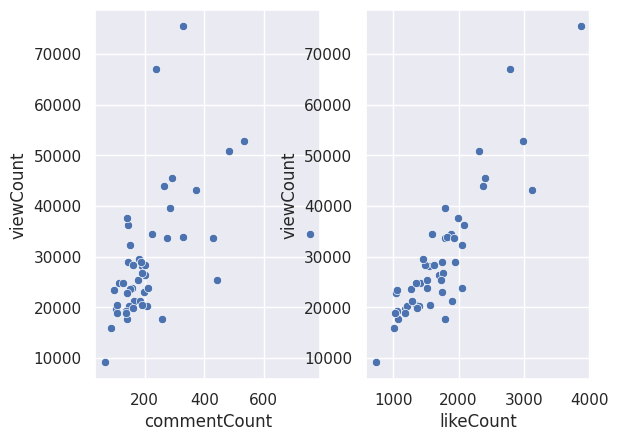

In [28]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video_df, x = "commentCount", y = "viewCount", ax=ax[0])
sns.scatterplot(data = video_df, x = "likeCount", y = "viewCount", ax=ax[1])

<Axes: xlabel='durationSecs', ylabel='Count'>

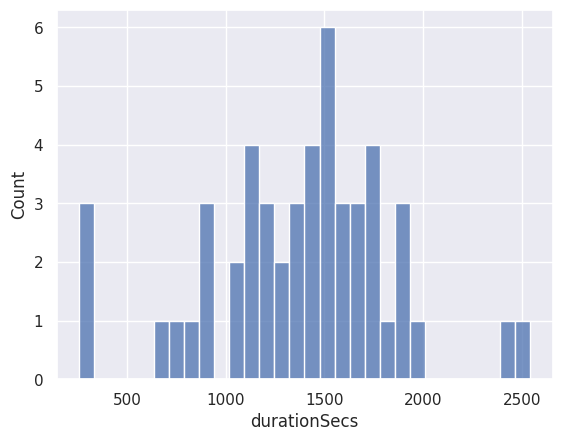

In [29]:
sns.histplot(data = video_df, x = 'durationSecs', bins=30)

In [30]:
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

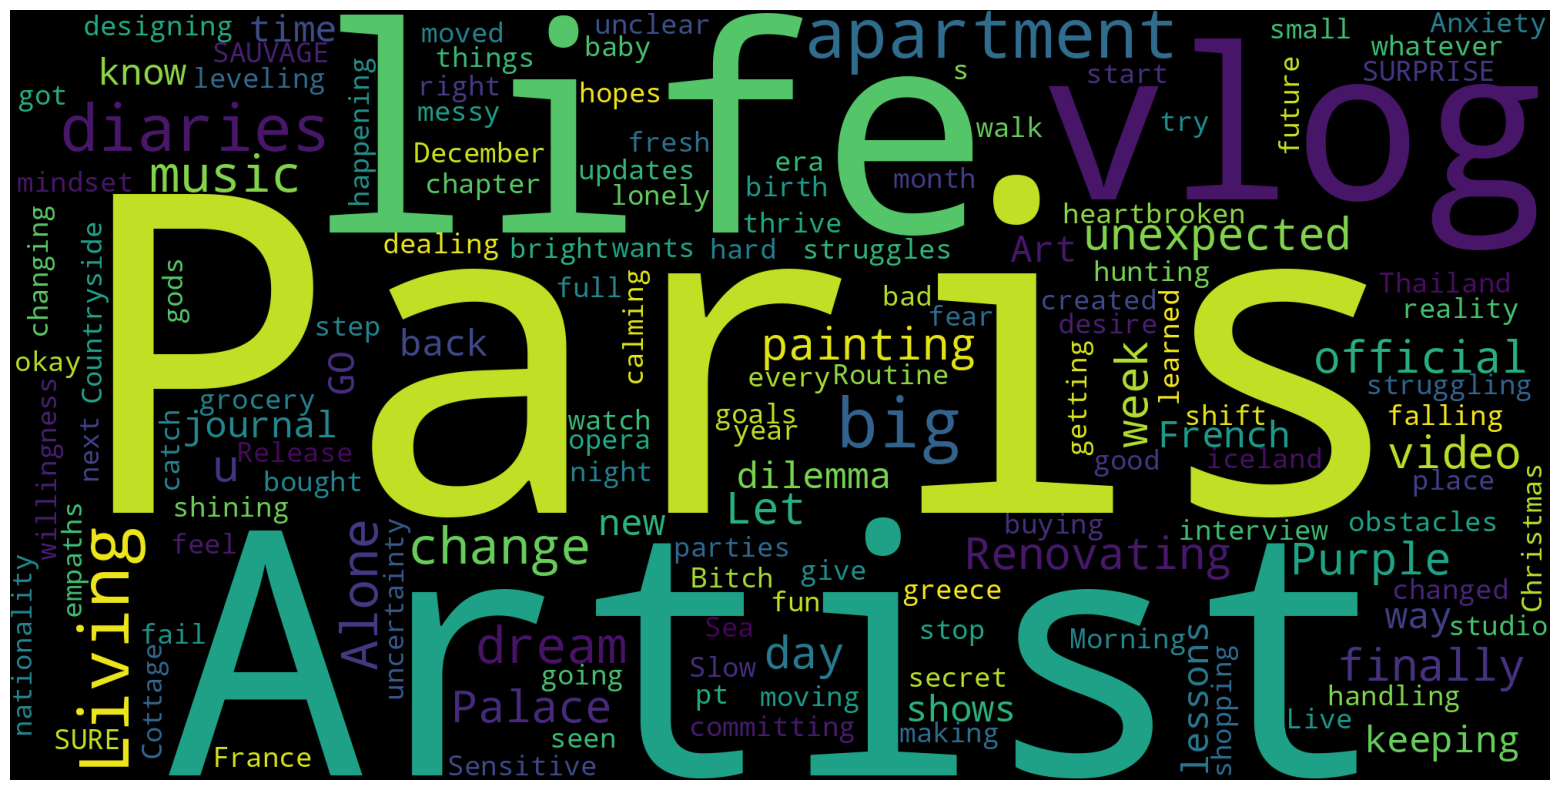

In [31]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud)
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',
                      colormap='viridis_r', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

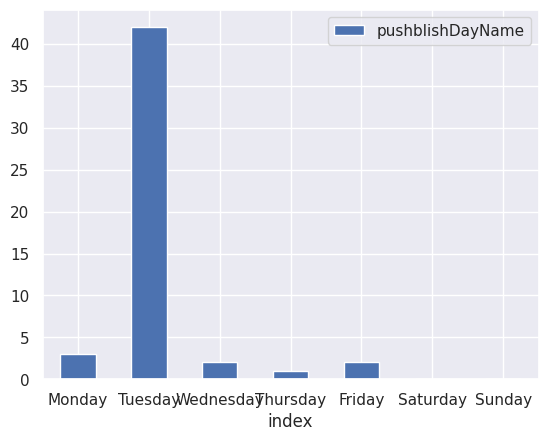

In [32]:
day_df = pd.DataFrame(video_df['pushblishDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='pushblishDayName', rot=0)